In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [12]:
data=pd.read_excel('Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [14]:
data.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [15]:
data.set_index('Month',inplace=True)

In [16]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [54]:
data[data.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [56]:
data.drop_duplicates(inplace=True)

In [57]:
data.shape

(80, 1)

# Visualizations

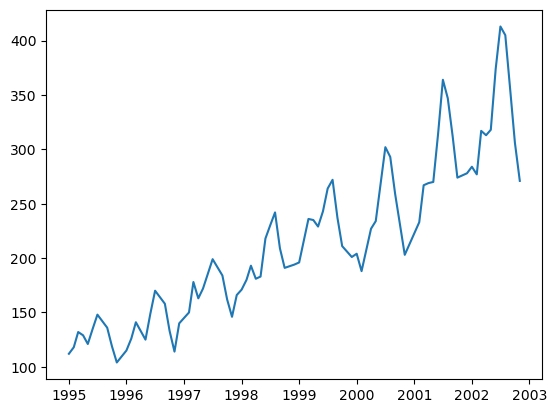

In [58]:
#Line plot
plt.plot(data)

By the above line plot we can say that the data follows upward trend and multiplicative seasonality

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

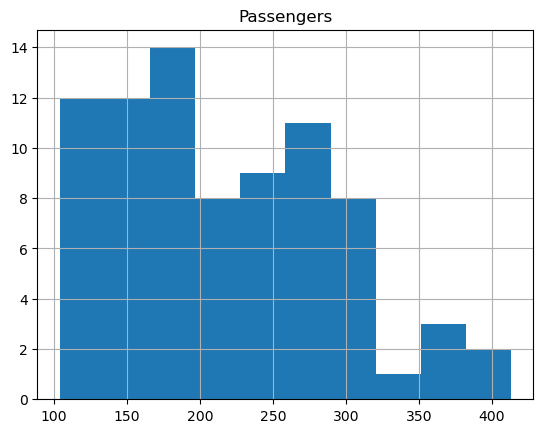

In [59]:
#Histogram
data.hist()

<Axes: ylabel='Density'>

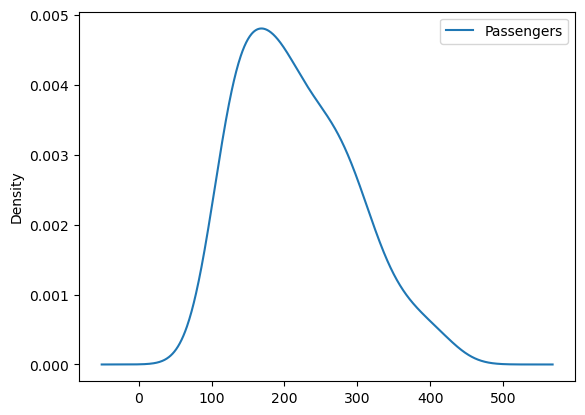

In [60]:
#density plot
data.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

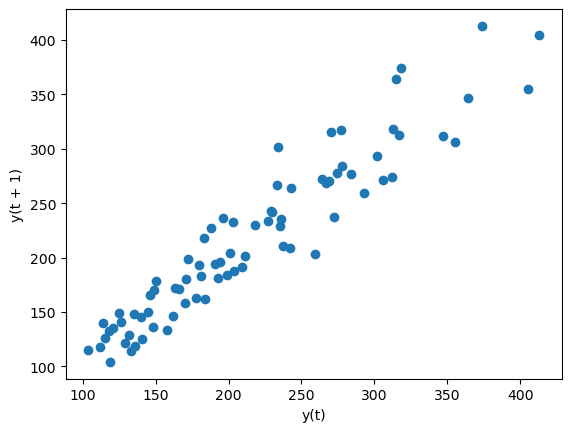

In [61]:
#lagplot
lag_plot(data)

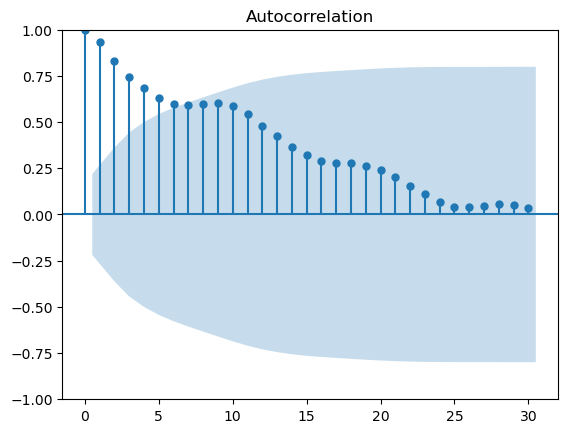

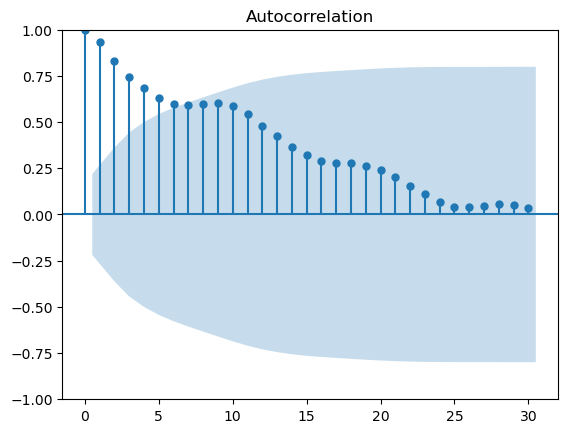

In [62]:
#ACF plot
plot_acf(data,lags=30)

# Upsampling

In [94]:
Upsampled=data.resample('M').mean()

In [95]:
Upsampled

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


Interpolate the Missing Values

In [100]:
interpolated=Upsampled.interpolate(method='linear')
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [101]:
interpolated.shape

(95, 1)

<Axes: xlabel='Month'>

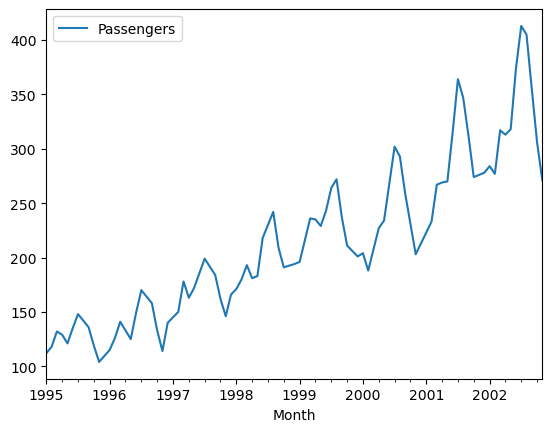

In [102]:
interpolated.plot()

# Transformations

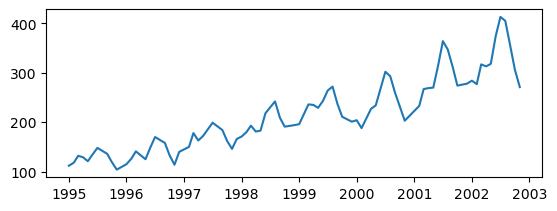

In [103]:
from matplotlib import pyplot
plt.subplot(211)
pyplot.plot(data)

(array([12., 12., 14.,  8.,  9., 11.,  8.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

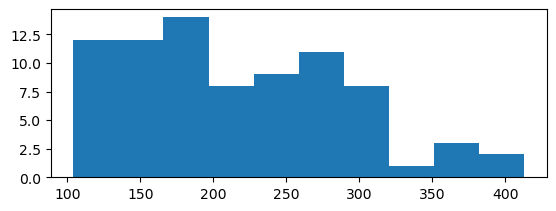

In [104]:
plt.subplot(212)
pyplot.hist(data)

# Sqrt transform

In [105]:
from pandas import DataFrame
from numpy import sqrt

In [106]:
dataframe1 = DataFrame(data.values)
dataframe1.columns = ['passengers']
dataframe1['passengers'] = sqrt(dataframe1['passengers'])

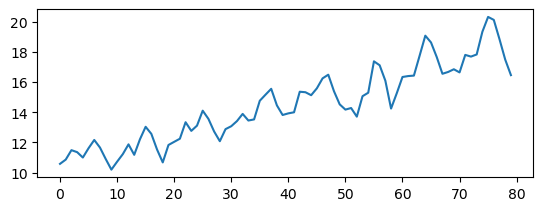

In [107]:
plt.subplot(211)
pyplot.plot(dataframe1['passengers'])

(array([ 8., 12.,  8., 12.,  8.,  9., 10.,  7.,  3.,  3.]),
 array([10.19803903, 11.21047527, 12.22291151, 13.23534775, 14.24778399,
        15.26022023, 16.27265647, 17.28509271, 18.29752895, 19.30996519,
        20.32240143]),
 <BarContainer object of 10 artists>)

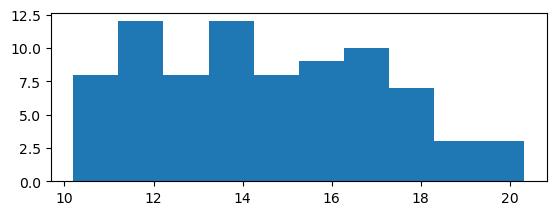

In [108]:
plt.subplot(212)
pyplot.hist(dataframe1['passengers'])

# Log Transform

In [109]:
from numpy import log
dataframe = DataFrame(data.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

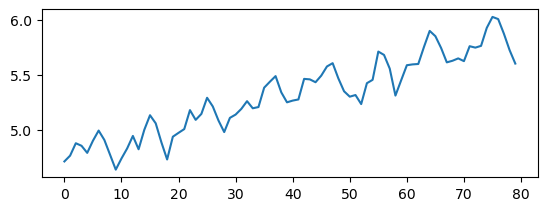

In [110]:
plt.subplot(211)
pyplot.plot(dataframe['passengers'])

(array([ 6.,  8.,  7.,  9., 12., 11.,  9.,  9.,  5.,  4.]),
 array([4.6443909 , 4.78229657, 4.92020224, 5.05810791, 5.19601358,
        5.33391925, 5.47182492, 5.60973058, 5.74763625, 5.88554192,
        6.02344759]),
 <BarContainer object of 10 artists>)

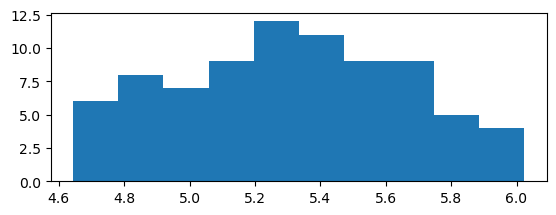

In [111]:
plt.subplot(212)
pyplot.hist(dataframe['passengers'])

# Splitting to test and train

In [113]:
train=interpolated.head(81)
test=interpolated.head(14)

# Moving Average

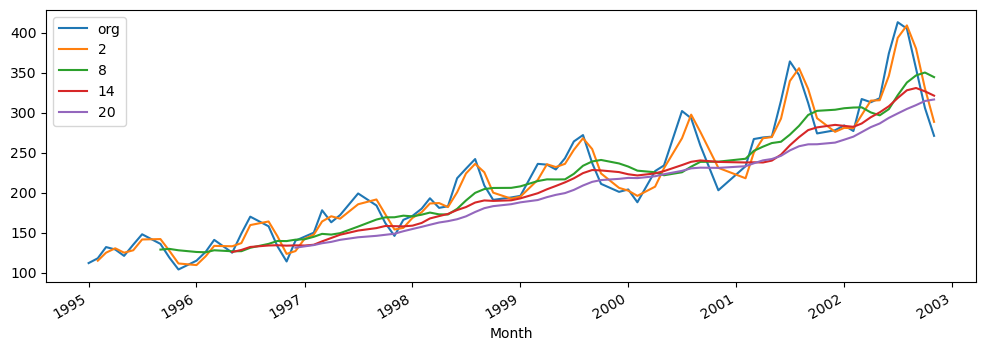

In [115]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

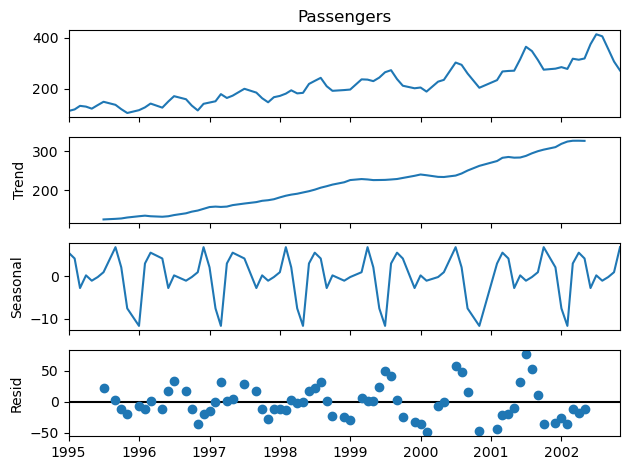

In [117]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

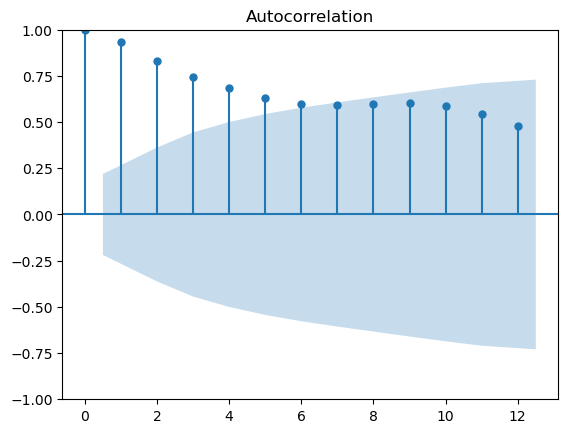

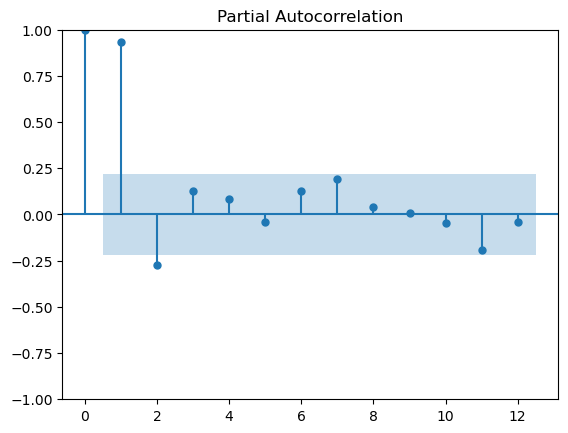

In [118]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

# Evaluation Metric MAPE

In [119]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [129]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers) 

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


9.341614627090788

# Holts Method

In [132]:
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers) 

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


8.622040536648202

# Holts winter exponential smoothing with additive seasonality and additive trend

In [140]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

3.9395726552472015

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [144]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

3.006233503415186

# Final Model by combining train and test

In [137]:
hwe_model_add_add = ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [145]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

2001-10-31    289.334586
2001-11-30    275.748341
2001-12-31    285.414749
2002-01-31    290.489488
2002-02-28    296.920036
2002-03-31    317.419164
2002-04-30    314.916182
2002-05-31    314.483586
2002-06-30    340.125716
2002-07-31    363.481375
Freq: M, dtype: float64

In [149]:
interpolated.reset_index(inplace=True)
interpolated['t']=1
interpolated

,level_0,index,Month,Passengers,t
0,0,0,1995-01-31,112.0,1
1,1,1,1995-02-28,118.0,1
2,2,2,1995-03-31,132.0,1
3,3,3,1995-04-30,129.0,1
4,4,4,1995-05-31,121.0,1
...,...,...,...,...,...
90,90,90,2002-07-31,413.0,1
91,91,91,2002-08-31,405.0,1
92,92,92,2002-09-30,355.0,1
93,93,93,2002-10-31,306.0,1


In [156]:
 pd.options.mode.copy_on_write = True 
for i,row in interpolated.iterrows():
    interpolated['t'].iloc[i]=i+1

C:\Users\MD SUFIYA\AppData\Local\Temp\ipykernel_59080\336965016.py:3: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment.
When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i]=i+1


In [157]:
interpolated['t_sq'] = (interpolated['t'])**2

In [160]:
interpolated["month"] = interpolated.Month.dt.strftime("%b")
interpolated["year"] = interpolated.Month.dt.strftime("%Y")

In [161]:
interpolated

,level_0,index,Month,Passengers,t,t_sq,month,year
0,0,0,1995-01-31,112.0,1,1,Jan,1995
1,1,1,1995-02-28,118.0,2,4,Feb,1995
2,2,2,1995-03-31,132.0,3,9,Mar,1995
3,3,3,1995-04-30,129.0,4,16,Apr,1995
4,4,4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...,...,...
90,90,90,2002-07-31,413.0,91,8281,Jul,2002
91,91,91,2002-08-31,405.0,92,8464,Aug,2002
92,92,92,2002-09-30,355.0,93,8649,Sep,2002
93,93,93,2002-10-31,306.0,94,8836,Oct,2002


In [162]:
## converting the dummy variables for month column
months = pd.get_dummies(interpolated['month']) 

In [163]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [166]:
airlines = pd.concat([interpolated,months],axis=1)

In [167]:
airlines

,level_0,index,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,1995-01-31,112.0,1,1,Jan,1995,True,False,False,False,False,False,False,False,False,False,False,False
1,1,1,1995-02-28,118.0,2,4,Feb,1995,False,True,False,False,False,False,False,False,False,False,False,False
2,2,2,1995-03-31,132.0,3,9,Mar,1995,False,False,True,False,False,False,False,False,False,False,False,False
3,3,3,1995-04-30,129.0,4,16,Apr,1995,False,False,False,True,False,False,False,False,False,False,False,False
4,4,4,1995-05-31,121.0,5,25,May,1995,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,90,2002-07-31,413.0,91,8281,Jul,2002,False,False,False,False,False,False,True,False,False,False,False,False
91,91,91,2002-08-31,405.0,92,8464,Aug,2002,False,False,False,False,False,False,False,True,False,False,False,False
92,92,92,2002-09-30,355.0,93,8649,Sep,2002,False,False,False,False,False,False,False,False,True,False,False,False
93,93,93,2002-10-31,306.0,94,8836,Oct,2002,False,False,False,False,False,False,False,False,False,True,False,False


In [170]:
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines

,level_0,index,Month,Passengers,t,t_sq,month,year,Jan,Feb,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,0,1995-01-31,112.0,1,1,Jan,1995,True,False,...,False,False,False,False,False,False,False,False,False,4.718499
1,1,1,1995-02-28,118.0,2,4,Feb,1995,False,True,...,False,False,False,False,False,False,False,False,False,4.770685
2,2,2,1995-03-31,132.0,3,9,Mar,1995,False,False,...,False,False,False,False,False,False,False,False,False,4.882802
3,3,3,1995-04-30,129.0,4,16,Apr,1995,False,False,...,True,False,False,False,False,False,False,False,False,4.859812
4,4,4,1995-05-31,121.0,5,25,May,1995,False,False,...,False,True,False,False,False,False,False,False,False,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,90,2002-07-31,413.0,91,8281,Jul,2002,False,False,...,False,False,False,True,False,False,False,False,False,6.023448
91,91,91,2002-08-31,405.0,92,8464,Aug,2002,False,False,...,False,False,False,False,True,False,False,False,False,6.003887
92,92,92,2002-09-30,355.0,93,8649,Sep,2002,False,False,...,False,False,False,False,False,True,False,False,False,5.872118
93,93,93,2002-10-31,306.0,94,8836,Oct,2002,False,False,...,False,False,False,False,False,False,True,False,False,5.723585


<Axes: xlabel='year', ylabel='Passengers'>

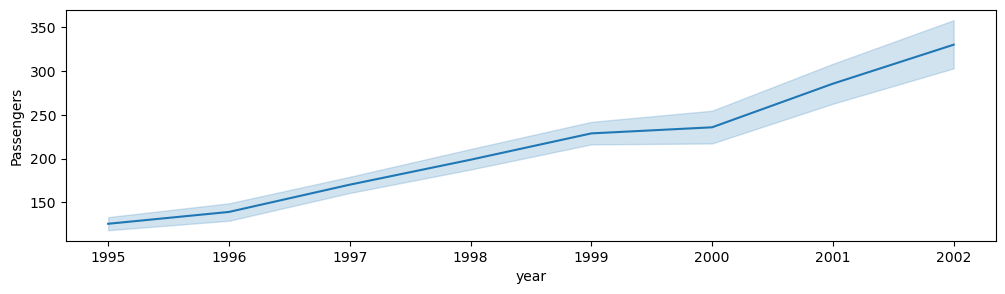

In [171]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

<Axes: xlabel='year', ylabel='Passengers'>

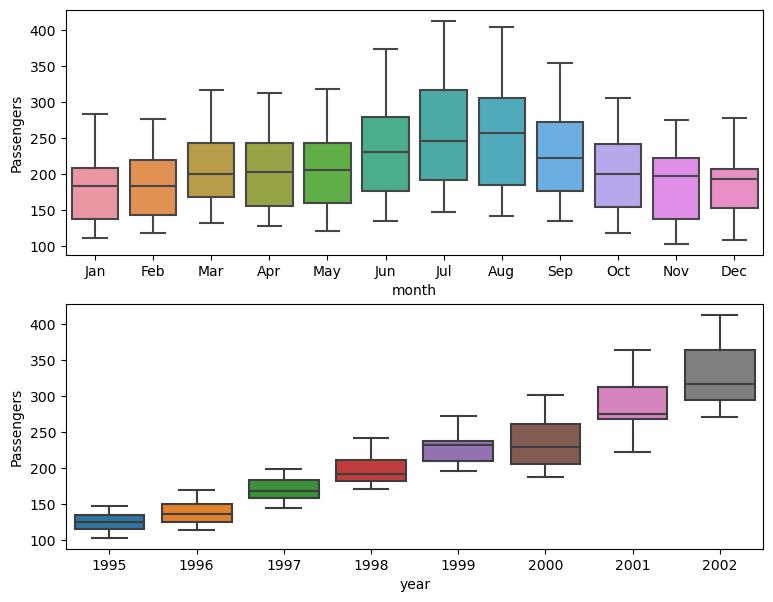

In [173]:
#boxplot
plt.figure(figsize=(9,7))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

# Splitting data

In [175]:
train =airlines.head(81)
test = airlines.tail(14)

In [177]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.87107195088723

In [178]:
#Exponential

Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821827

In [181]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.709870425152

In [183]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.55762388601406

In [185]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.78537191150704

In [186]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917107

In [187]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

13.188070730264188

In [190]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


least rmse value ---> Best Model

hence,rmse_Mult_add_sea is the best model